#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b>Md. Abu Shahan<br>
<b>Reg. No:</b> 170103020017

### Assignment 1: Perceptron 
<b>This assignment contains four tasks</b><br>
Perceptron is the first neural network model that can learn from data, invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. 

* Linear classifier.
* Binary or bipolar data
\begin{equation}
  \hat y=
  \begin{cases}
    1, &  \sum_{i}^{m} w_i.x_i+b> 0  \\
    -1, & \text{otherwise}
  \end{cases}
\end{equation}

Or, we can write [for a single data vector= x, weight vector=w and bias=b]
\begin{equation}
  z=x.w+b\\
  \hat y=sign(z)
\end{equation}

Or, we can simplify,
\begin{equation}
  z=X.W^T\\
  \hat y=sign(z)
\end{equation}
where X=data (NxD), W=weight vector(1xD) , b=bias(1x1)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X=np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
y=np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

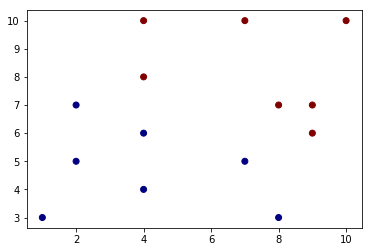

In [29]:
plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')   
plt.show()

<b>Task_1: calculate output and plot the data</b><br>
Given, w=[-2.0, 0.4, 0.1], calculate output $\hat y$ <br> <b>note:</b> w[0]=bias<br>
 
* Output should be, $\hat y=[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]$
* Note: variable XX contains 1 in the first column and the rest is same as X. This will remove the necessity of useing seperate bias.

In [30]:
XX=np.c_[np.ones(X.shape[0]), X]  #add column with value 1 in the first column. to remove the need of separate bias
print(XX[:4])

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]]


In [32]:
#your code goes here.
y_cap=[]
w=np.array([-2.0,0.4,0.1])
for i in range(0,len(XX)):
    if (np.dot(XX[i],w) > 0):
        y_cap.append(1)
    else:
        y_cap.append(-1)
print(y_cap)

[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]


<b>Plotting the hyperplane</b>

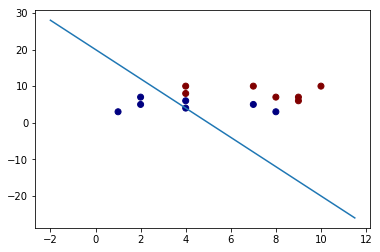

In [33]:
w=[-2.0, 0.4, 0.1]

nx=np.arange(-2,12,0.5)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

<b>Task_2: Update check</b>
Let's choose a missclassified data,  $rx=[1, 4,6], ry=-1$ <br>
Update rule: $w=w+ \eta(ry*rx)$  <br>
Where, learning rate $0> \eta \leq 1$ <br>
Let, $\eta=0.1$  <br>
* update w for the data. w should be [-2.1,  0. , -0.5]

In [34]:
#your code goes here.
rx=np.array([1,4,6])
ry=-1
learning_rate=.1
#final equation w=w-(learning_rate*rx)
w=w-(learning_rate*rx)
print(w)

[-2.1  0.  -0.5]


<b>Task_3: Train perceptron</b> <br>

* your task is to implement perceptron learning algorithm. Your implementation should correctly classify the data above. <br>
* Print the trained W <br>
* Plot the data and the decision boundary <br>
* Average Loss $loss=\frac{1}{N} \sum(y-\hat y)^2$
* Plot loss history.

In [35]:
#your code goes here.
x = np.array(XX)
avg_loss=[]

def li_reg(x,w):
    val=0
    for i,j in zip(x,w):
        val+=i*j
    return val

def give_sign(val):
    return np.sign(val)

def predict(x, w):
    hp=[]
    for i in x: 
        lr=li_reg(i,w)
        h=give_sign(lr)
        hp.append(h)
    return hp

def miss_class(py, y):
    miss=[]
    loss=0
    for i in range(len(y)):
        loss+=((y[i]-py[i])**2)
        if py[i]!=y[i]:
            miss.append(i)
    avg_loss.append(loss/len(y))
    return miss
def perceptron(x, y):
    w = np.random.rand(3)
    learning_rate=.1
    py=predict(x,w)
    miss=miss_class(py,y)
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=x[rnd]
        ry=y[rnd]
        w=w+learning_rate*(rx*ry)
        py=predict(x,w)
        miss=miss_class(py,y)
        
    return w

w=perceptron(x,y)

In [36]:
print(w)

[-5.36145408  0.35821729  0.55550877]


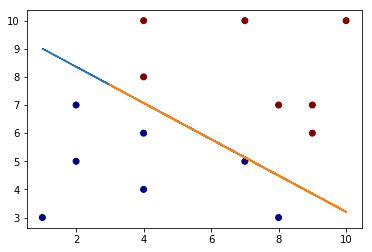

In [37]:
nx=np.array(X)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

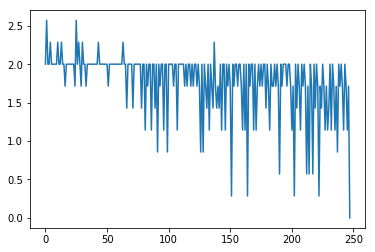

In [38]:
plt.plot(avg_loss )  
plt.show()

<b>Task_4: Train a perceptron on Iris Data</b>
* First 100 data will be used.
* Only the first two features will be used for this task.

* Your implementation should correctly classify all the data.
* Plot the prediction, decision and loss history.

In [39]:
from sklearn import datasets   

In [40]:
datas=datasets.load_iris()
X=datas['data'][:100]      #first two class only.
y=datas['target'][:100]
# print(X.shape, y.shape)

X=X[:,:2]  #first two column.
print('X:',X.shape, '  y:',y.shape)
for i in range(0,len(y)):
    if y[i]==0:
        y[i]=-1

X: (100, 2)   y: (100,)


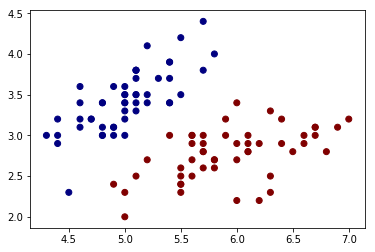

In [41]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet') 
plt.show()

In [42]:
#your code goes here.
XX=np.c_[np.ones(X.shape[0]), X]
x = np.array(XX)
avg_loss=[]

def li_reg(x,w):
    val=0
    for i,j in zip(x,w):
        val+=i*j
    return val

def give_sign(val):
    return np.sign(val)

def predict(x, w):
    hp=[]
    for i in x: 
        lr=li_reg(i,w)
        h=give_sign(lr)
        hp.append(h)
    return hp

def miss_class(py, y):
    miss=[]
    loss=0
    for i in range(len(y)):
        loss+=((y[i]-py[i])**2)
        if py[i]!=y[i]:
            miss.append(i)
    avg_loss.append(loss/len(y))
    return miss
def perceptron(x, y):
    w = np.random.rand(3)
    learning_rate=.1
    py=predict(x,w)
    miss=miss_class(py,y)
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=x[rnd]
        ry=y[rnd]
        w=w+learning_rate*(rx*ry)
        py=predict(x,w)
        miss=miss_class(py,y)
    return w

w=perceptron(x,y)
print(w)

[-9.95639569  6.40254487 -8.19834291]


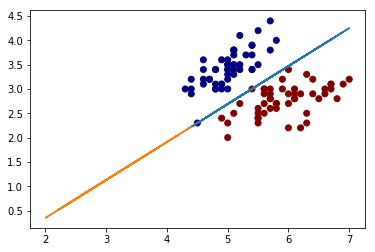

In [43]:
nx=np.array(X)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1], c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

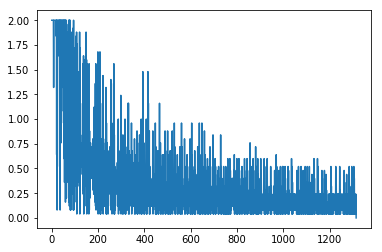

In [44]:
plt.plot(avg_loss )  
plt.show()

### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Md. Abu Shahan</u> bearing registration no. <u>170103020017</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Md. Abu Shahan</u><br>
Date: <u>15/07/20</u>

_your__writing_